# Open Source Data Analysis- Unsupervised Machine Learning

### 1) Importing Libraries and Setting Path

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

#creating Paths
path= r'C:\Users\wjzak\Dropbox\Career Foundry\Data Immersion\Module 6- Advanced Analytics & Dashboard Design\09-2025- HR Data MNC- Analysis'

#using the path to pull file name and read the clean products data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'HR_Data_MNC_Data_Reg.csv'), index_col = False)

### 2) Data Prep

In [2]:
df.head()

,Unnamed: 0,Employee_ID,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary,City,Country,Status2
0,0,EMP0000001,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,125076,Isaacland,Denmark,Inactive
1,1,EMP0000002,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,66878,Anthonyside,Costa Rica,Active
2,2,EMP0000003,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,112826,Port Christinaport,Saudi Arabia,Active
3,3,EMP0000004,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,78162,Port Shelbychester,Antigua and Barbuda,Active
4,4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,42217,Lake Kimberly,Palestinian Territory,Active


In [3]:
#drop the unnamed variable- we already have an employee ID to reference
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.rename(columns = {'Experience_Years' : 'Exp'}, inplace = True)

In [5]:
#created this second data frame because of all the categorical data. 
#This is an easier way to examine the two main variables
df2 = df[['Exp', 'Salary']].copy()

### 3) The Elbow Technique

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2017638862835653.5,
 -793052734443673.5,
 -387722159321385.1,
 -261533572426801.44,
 -128556340782843.28,
 -95058771568311.34,
 -70210466630103.75,
 -56755719600239.07,
 -48217466523162.9]

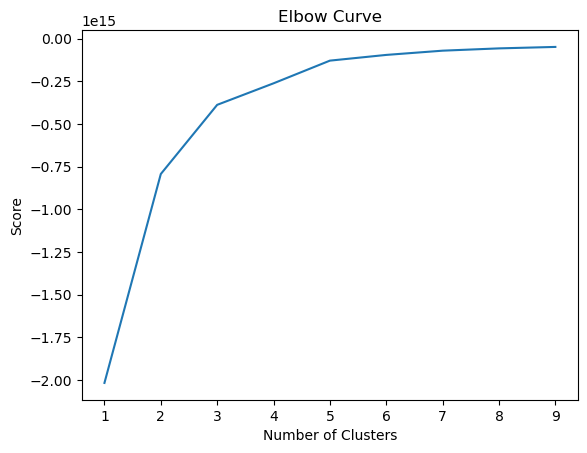

In [8]:
#Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow suggests that 5 clusters is the most appropriate for this data

### 4. k-means Clustering

In [9]:
#Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [10]:
#Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=5)

In [11]:
df2['clusters'] = kmeans.fit_predict(df2)

In [12]:
df2.head()

,Exp,Salary,clusters
0,14,125076,2
1,7,66878,4
2,2,112826,2
3,1,78162,1
4,0,42217,0


In [13]:
df2['clusters'].value_counts()

clusters
4    680375
0    612673
1    467915
2    196960
3     42077
Name: count, dtype: int64

C:\Users\wjzak\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


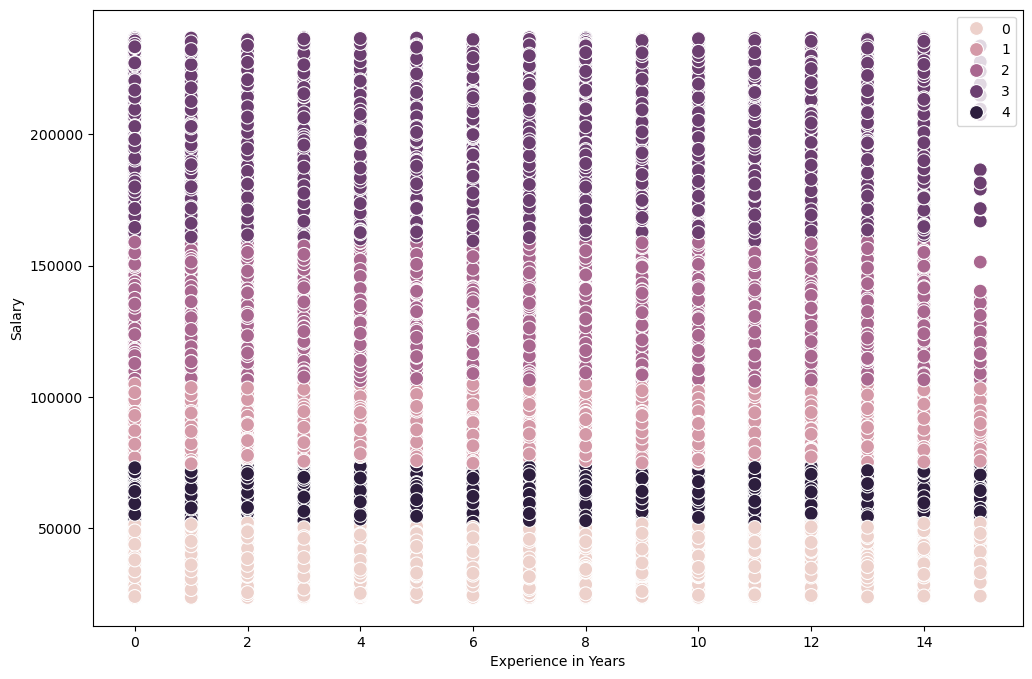

In [14]:
# Plot the clusters for the "Experience in Years" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Exp'], y=df2['Salary'], hue=kmeans.labels_, s=100) 
ax.grid(False) #This removes the grid from the background.
plt.xlabel('Experience in Years') #Label x-axis.
plt.ylabel('Salary') #Label y-axis.
plt.show()

Summary: The clusters were able to create different income groups. The 5 clusters created a few more groups than I initially would've created but they do seem to follow their own trends. The low income group would be the purple, followed by the peach group, then dark purple making at most around 100k, The rose pink group made an exceptional 100-160k, and finally the light pink group are the highest earners with over 150k each.

In [16]:
#add cluster variables to original dataframe
df['cluster'] = df2['clusters']

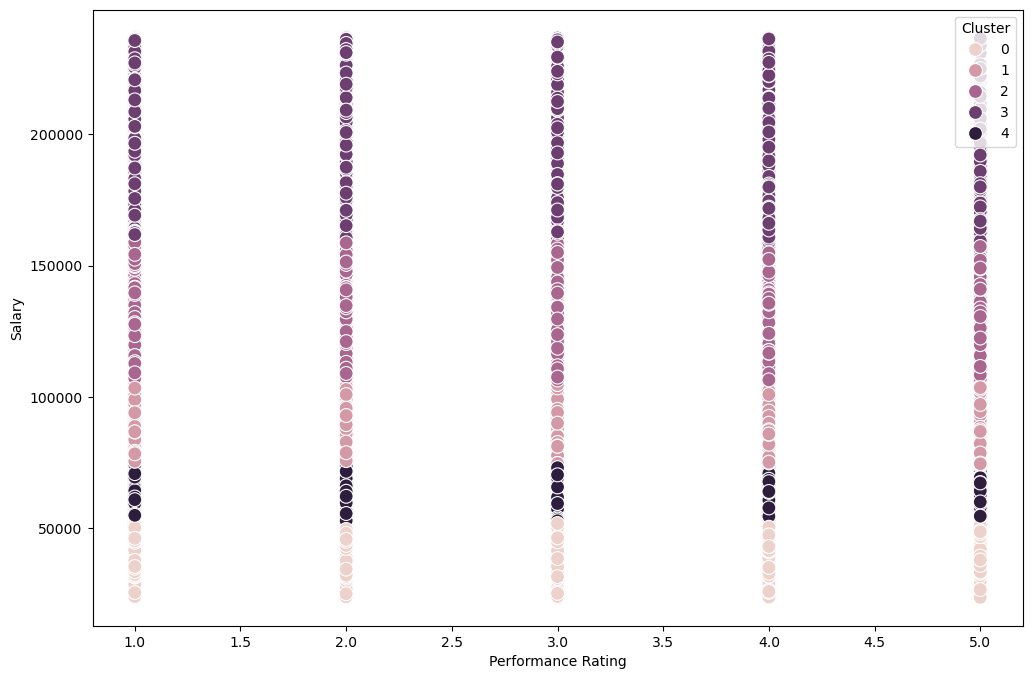

In [17]:
# Plot the clusters for the "Performance Rating" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Performance_Rating'], y=df['Salary'], hue=kmeans.labels_, s=100) 
ax.grid(False) #This removes the grid from the background.
plt.xlabel('Performance Rating') #Label x-axis.
plt.ylabel('Salary') #Label y-axis.
plt.legend(title='Cluster', loc='upper right')
plt.show()

Summary: The salaries are fairly split amongst the different performance ratings. This is likely due to the data being generated. The clusters make the highest income earners look like a larger section of data but they are the smallest group. This is explained in the demographics section further. 

In [18]:
df2.loc[df2['clusters'] == 4, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 3, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'rose pink'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'light pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'peach'

In [19]:
df.groupby('cluster').agg({'Exp':['mean', 'median'], 
                         'Salary':['mean', 'median'],
                          'Performance_Rating':['mean', 'median'], })

Exp                Salary           Performance_Rating       
             mean median           mean    median               mean median
cluster                                                                    
0        5.004466    5.0   41730.621594   41909.0           2.998696    3.0
1        5.004375    5.0   86634.681098   86072.0           3.000962    3.0
2        5.016145    5.0  124882.132022  124103.0           2.998746    3.0
3        5.021936    4.0  193507.336383  190750.0           2.995698    3.0
4        5.017179    5.0   62721.375874   62503.0           3.001579    3.0

Clusters Descriptives:
The clusters did not show much variation for the experience in years variable. The clusters each were able to capture the salary variable quite well. The mean and median were almost identical in all of the groups showing that these salary groups were able to represent themselves appropriately. 
It should be noted that cluster 1 or light pink was the smallest group with only 41845 points where as the other clusters had 200k to 600k. This light pink group was the high income earners so they were still a minority in the overall data. This is what you would expect when examining a large HR dataset and this is reflected here.
Perforamnce rating did not demonstrate anything unique as well. This may be largely a result of the generated data being studied here.

Future Analyses:
This k-means cluster was able to create salary groups that I believe would not typically have been made. Most would categorize a large chunk of the 6 figure salaries together and I think there is value in the 5 clusters shown here. It could provide some nuance in future testing to see how these tighter salary clusters may share common traits/characteristics.

### 5) Data Export to Prepared Folder

In [20]:
#Save updated csv file to Prepared Data Folder
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'HR_Data_MNC_Data_Cluster.csv'))